## 線形SVM

     pcost       dcost       gap    pres   dres
 0: -4.7622e+00 -7.6934e+00  2e+02  2e+01  2e+00
 1: -2.0306e+00 -1.2685e+00  2e+01  1e+00  1e-01
 2: -7.6802e-02 -9.1246e-01  9e-01  4e-03  4e-04
 3: -3.1397e-01 -5.1974e-01  2e-01  8e-04  8e-05
 4: -3.9336e-01 -5.2819e-01  1e-01  4e-04  4e-05
 5: -4.9590e-01 -5.1218e-01  2e-02  3e-05  3e-06
 6: -5.0638e-01 -5.0902e-01  3e-03  5e-06  5e-07
 7: -5.0854e-01 -5.0857e-01  3e-05  5e-08  5e-09
 8: -5.0856e-01 -5.0856e-01  3e-07  5e-10  5e-11
Optimal solution found.
[9.40252916e-09 6.58766228e-02 2.19677875e-09 4.15004585e-09
 2.40823984e-08 4.42687166e-01 2.72058346e-09 1.28600298e-08
 2.48158062e-09 2.45921112e-09 3.09957410e-08 1.93391325e-09
 4.43884071e-09 2.18593802e-09 3.08560356e-09 2.51363641e-09
 4.07012712e-09 4.87764490e-09 3.71642592e-09 2.32260319e-09
 4.62764284e-09 1.14991079e-07 2.99870774e-09 2.23605053e-09
 1.64988572e-09 1.27257781e-09 2.63383215e-09 4.89029986e-09
 8.83111378e-09 2.39536941e-09 4.11057775e-09 1.53654538e-09

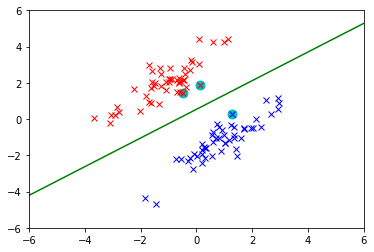

In [11]:
# 線形SVM
# cvxoptのQuadratic Programmingを解く関数を使用

import numpy as np
from scipy.linalg import norm
import cvxopt
import cvxopt.solvers
from pylab import *

N = 100  # データ数

def f(x1, w, b):
    return - (w[0] / w[1]) * x1 - (b / w[1])

#aとbの内積
def kernel(x, y):
    return np.dot(x, y)  # 線形カーネル

if __name__ == "__main__":
    # 訓練データを作成
    cls1 = []
    cls2 = []

    mean1 = [-1, 2]
    mean2 = [1, -1]
    cov = [[1.0,0.8], [0.8, 1.0]]
    
    # 二次元正規分布に従う乱数の作成
    cls1.extend(np.random.multivariate_normal(mean1, cov, int(N/2)))
    cls2.extend(np.random.multivariate_normal(mean2, cov, int(N/2)))
    
    
    # データ行列Xを作成
    #cls1の下にcls2のデータが来ているような行列構造
    X = vstack((cls1, cls2))
    
    # ラベルtを作成
    t = []
    for i in range(int(N/2)):
        t.append(1.0)   # クラス1
    for i in range(int(N/2)):
        t.append(-1.0)  # クラス2
    t = array(t)
    
    
    # ラグランジュ乗数を二次計画法（Quadratic Programming）で求める
    # ラグランジュ未定乗数法は最大化が目的だが、ここでは-1をかけて、二次計画法で最小値を求めている。
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = t[i] * t[j] * kernel(X[i], X[j])
    Q = cvxopt.matrix(K)
    p = cvxopt.matrix(-np.ones(N))             # -1がN個の列ベクトル
    G = cvxopt.matrix(np.diag([-1.0]*N))       # 対角成分が-1のNxN行列
    h = cvxopt.matrix(np.zeros(N))             # 0がN個の列ベクトル
    A = cvxopt.matrix(t, (1,N))                # N個の教師信号が要素の行ベクトル（1xN）
    b = cvxopt.matrix(0.0)                     # 定数0.0
    sol = cvxopt.solvers.qp(Q, p, G, h, A, b)  # 二次計画法でラグランジュ乗数aを求める
    a = array(sol['x']).reshape(N)             # 'x'がaに対応する
    print (a)

    
    # サポートベクトルのインデックスを抽出
    S = []
    for i in range(len(a)):
        if a[i] < 0.00001: continue #a[i]がこの数字以下だと飛ばすように指示　サポートベクトルの数がこれをくぐり抜ける数と一致
        S.append(i)
    
    # wを計算　　最小化したかった値。
    w = np.zeros(2)
    for n in S:
        w += a[n] * t[n] * X[n]
    
    # bを計算　　その時のbの値。
    sum = 0
    for n in S:
        temp = 0
        for m in S:
            temp += a[m] * t[m] * kernel(X[n], X[m])
        sum += (t[n] - temp)
    b = sum / len(S)
    
    print (S, b)
    
    # 訓練データを描画
    x1, x2 = np.array(cls1).transpose()
    plot(x1, x2, 'rx')
    
    x1, x2 = np.array(cls2).transpose()
    plot(x1, x2, 'bx')
    
    # サポートベクトルを描画（点の中で丸で囲まれた点）
    for n in S:
        scatter(X[n,0], X[n,1], s=80, c='c', marker='o')
    
    # 識別境界を描画
    x1 = np.linspace(-6, 6, 1000)
    x2 = [f(x, w, b) for x in x1]
    plot(x1, x2, 'g-')
    
    xlim(-6, 6)
    ylim(-6, 6)
    show()

## 非線形SVM

     pcost       dcost       gap    pres   dres
 0: -4.2196e+01 -1.0954e+02  2e+02  1e+01  2e+00
 1: -7.3335e+01 -1.3427e+02  1e+02  5e+00  8e-01
 2: -1.2186e+02 -1.8619e+02  1e+02  4e+00  7e-01
 3: -1.9090e+02 -2.5077e+02  9e+01  3e+00  4e-01
 4: -2.4944e+02 -3.2045e+02  9e+01  1e+00  2e-01
 5: -2.7951e+02 -2.8817e+02  1e+01  2e-01  3e-02
 6: -2.8103e+02 -2.8132e+02  4e-01  5e-03  8e-04
 7: -2.8109e+02 -2.8109e+02  4e-03  5e-05  8e-06
 8: -2.8109e+02 -2.8109e+02  4e-05  5e-07  8e-08
 9: -2.8109e+02 -2.8109e+02  4e-07  5e-09  8e-10
Optimal solution found.
[ 1.32694068e-09  2.87591773e-09  1.98818765e-09  3.34122581e-10
  7.70197505e-10  4.21807343e-10  1.53697933e-09  1.79178522e-09
  1.15552671e+01  5.61207384e-10  3.48554371e-09  4.81324410e-10
  2.18256948e-09  6.67630367e-10  5.00413655e-10  1.87179893e-09
  1.60221045e-09  6.04260757e-10  6.84832125e-10  1.85951571e+01
  5.56605624e-09  6.07659473e-10  1.45189425e-09  4.37752547e-09
  2.01828187e+02  4.91125236e+01  7.73010819e-11

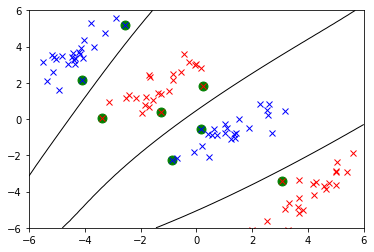

In [13]:
# 非線形SVM
# cvxoptのQuadratic Programmingを解く関数を使用

import numpy as np
from scipy.linalg import norm
import cvxopt
import cvxopt.solvers
from pylab import *

N = 100         # データ数
P = 3           # 多項式カーネルのパラメータ
SIGMA = 5.0     # ガウスカーネルのパラメータ

# 多項式カーネル
def polynomial_kernel(x, y):
    return (1 + np.dot(x, y)) ** P

# ガウスカーネル
def gaussian_kernel(x, y):
    return np.exp(-norm(x-y)**2 / (2 * (SIGMA ** 2)))

# どちらのカーネル関数を使うかここで指定
kernel = gaussian_kernel

# Sを渡してサポートベクトルだけで計算した方が早い
# サポートベクトルはa[n]=0なのでsumに足す必要ない
def f(x, a, t, X, b):
    sum = 0.0
    for n in range(N):
        sum += a[n] * t[n] * kernel(x, X[n])
    return sum + b

if __name__ == "__main__":
    # 訓練データを作成
    cls1 = []
    cls2 = []

    mean1 = [-1, 2]
    mean2 = [1, -1]
    mean3 = [4, -4]
    mean4 = [-4, 4]
    cov = [[1.0,0.8], [0.8, 1.0]]
    
    cls1.extend(np.random.multivariate_normal(mean1, cov, int(N/4)))
    cls1.extend(np.random.multivariate_normal(mean3, cov, int(N/4)))
    cls2.extend(np.random.multivariate_normal(mean2, cov, int(N/4)))
    cls2.extend(np.random.multivariate_normal(mean4, cov, int(N/4)))
    
    # データ行列Xを作成
    X = vstack((cls1, cls2))
    
    # ラベルtを作成
    t = []
    for i in range(int(N/2)):
        t.append(1.0)   # クラス1
    for i in range(int(N/2)):
        t.append(-1.0)  # クラス2
    t = array(t)
    
    # ラグランジュ乗数を二次計画法（Quadratic Programming）で求める
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = t[i] * t[j] * kernel(X[i], X[j])
    
    Q = cvxopt.matrix(K)
    p = cvxopt.matrix(-np.ones(N))
    G = cvxopt.matrix(np.diag([-1.0]*N))
    h = cvxopt.matrix(np.zeros(N))
    A = cvxopt.matrix(t, (1,N))
    b = cvxopt.matrix(0.0)
    sol = cvxopt.solvers.qp(Q, p, G, h, A, b)
    a = array(sol['x']).reshape(N)
    print (a)
    
    # サポートベクトルのインデックスを抽出
    S = []
    for n in range(len(a)):
        if a[n] < 1e-5: continue
        S.append(n)
    
    # bを計算
    sum = 0
    for n in S:
        temp = 0
        for m in S:
            temp += a[m] * t[m] * kernel(X[n], X[m])
        sum += (t[n] - temp)
    b = sum / len(S)
    
    print (S, b)
    
    # 訓練データを描画
    x1, x2 = np.array(cls1).transpose()
    plot(x1, x2, 'rx')
    
    x1, x2 = np.array(cls2).transpose()
    plot(x1, x2, 'bx')
    
    # サポートベクトルを描画
    for n in S:
        scatter(X[n,0], X[n,1], s=80, c='g', marker='o')
    
    # 識別境界を描画
    X1, X2 = meshgrid(linspace(-6,6,50), linspace(-6,6,50))
    w, h = X1.shape
    X1.resize(X1.size)
    X2.resize(X2.size)
    Z = array([f(array([x1, x2]), a, t, X, b) for (x1, x2) in zip(X1, X2)])
    X1.resize((w, h))
    X2.resize((w, h))
    Z.resize((w, h))
    CS = contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    
    for n in S:
        print (f(X[n], a, t, X, b))
    
    xlim(-6, 6)
    ylim(-6, 6)
    show()

参考にしたページ
https://qiita.com/ta-ka/items/e6fd0b6fc46dbab4a651
http://aidiary.hatenablog.com/entry/20100501/1272712699